# NLP_Word Embedding3_Word2vec

## Word Embedding Contd ...

> Example 1. Have a good day and 2. Have a great day.

Let's consider one hot encoder vector for each of these words in V. Length of our one-hot encoded vector would be equal to the size of V(=5). We would have a vector of zeros except for the element at the index representing the corresponding word in the vocabulary. That particular element would be one.


* Let's see how it looks


Have=[1,0,0,0,0]; a=[0,1,0,0,0]; good-[0,0,1,0,0]; great-[0,0,0,1,0]; day=[0,0,0,0,1] (represents transpose)

If we try to visualize these encodings, we can think of a 5 dimensional space, where each word occupies one of the dimensions and has nothing to do with the rest (no projection along the other dimensions). This means 'good' and 'great' are as different as 'day' and 'have', which is not true. Our objective is to have words with similar context occupy
close spatial positions. **Mathematically, the cosine of the angle between such vectors should be close to 1, i.e. angle close to 0.**


Since there are few shortcomings in CountVectorizer and TF-IDF vectorizer and those are solved by Word2Vec

## Word2vec

In [1]:
import re
import nltk
import string
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
paragraph = """MINI REVIEW
published: 28 May 2020
doi: 10.3389/fpubh.2020.00216
Frontiers in Public Health | www.frontiersin.org 1 May 2020 | Volume 8 | Article 216
Edited by:
Murat Akova,
Hacettepe University, Turkey
Reviewed by:
Tarek Adnan Ahmad,
Bibliotheca Alexandrina, Egypt
SriSowmya Sanisetty,
Independent Researcher, Cambridge,
MA, United States
*Correspondence:
Krishnadas Nandakumar
mailnandakumar77@gmail.com
Specialty section:
This article was submitted to
Infectious Diseases – Surveillance,
Prevention and Treatment,
a section of the journal
Frontiers in Public Health
Received: 21 February 2020
Accepted: 11 May 2020
Published: 28 May 2020
Citation:
Keni R, Alexander A, Nayak PG,
Mudgal J and Nandakumar K (2020)
COVID-19: Emergence, Spread,
Possible Treatments, and Global
Burden. Front. Public Health 8:216.
doi: 10.3389/fpubh.2020.00216
COVID-19: Emergence, Spread,
Possible Treatments, and Global
Burden
Raghuvir Keni 1
, Anila Alexander 2
, Pawan Ganesh Nayak 1
, Jayesh Mudgal 1 and
Krishnadas Nandakumar 1
*
1 Department of Pharmacology, Manipal College of Pharmaceutical Sciences, Manipal Academy of Higher Education,
Manipal, India, 2 Department of Health Sciences, School of Education and Health, Cape Breton University, Sydney, NS,
Canada
The Coronavirus (CoV) is a large family of viruses known to cause illnesses ranging from
the common cold to acute respiratory tract infection. The severity of the infection may be
visible as pneumonia, acute respiratory syndrome, and even death. Until the outbreak
of SARS, this group of viruses was greatly overlooked. However, since the SARS and
MERS outbreaks, these viruses have been studied in greater detail, propelling the vaccine
research. On December 31, 2019, mysterious cases of pneumonia were detected in
the city of Wuhan in China’s Hubei Province. On January 7, 2020, the causative agent
was identified as a new coronavirus (2019-nCoV), and the disease was later named as
COVID-19 by the WHO. The virus spread extensively in the Wuhan region of China and
has gained entry to over 210 countries and territories. Though experts suspected that
the virus is transmitted from animals to humans, there are mixed reports on the origin
of the virus. There are no treatment options available for the virus as such, limited to
the use of anti-HIV drugs and/or other antivirals such as Remdesivir and Galidesivir. For
the containment of the virus, it is recommended to quarantine the infected and to follow
good hygiene practices. The virus has had a significant socio-economic impact globally.
Economically, China is likely to experience a greater setback than other countries from
the pandemic due to added trade war pressure, which have been discussed in this paper.
Keywords: 2019-nCoV, COVID-19, SARS-CoV-2, coronavirus, pandemic, SARS
INTRODUCTION
Coronaviridae is a family of viruses with a positive-sense RNA that possess an outer viral coat. When
looked at with the help of an electron microscope, there appears to be a unique corona around it.
This family of viruses mainly cause respiratory diseases in humans, in the forms of common cold or
pneumonia as well as respiratory infections. These viruses can infect animals as well (1, 2). Up until
the year 2003, coronavirus (CoV) had attracted limited interest from researchers. However, after
the SARS (severe acute respiratory syndrome) outbreak caused by the SARS-CoV, the coronavirus
was looked at with renewed interest (3, 4). This also happened to be the first epidemic of the
21st century originating in the Guangdong province of China. Almost 10 years later, there was
a MERS (Middle East respiratory syndrome) outbreak in 2012, which was caused by the MERSCoV (5, 6). Both SARS and MERS have a zoonotic origin and originated from bats. A unique
feature of these viruses is the ability to mutate rapidly and adapt to a new host. The zoonotic
origin of these viruses allows them to jump from host to host. Coronaviruses are known to use
Keni et al. COVID-19: A Summary
the angiotensin-converting enzyme-2 (ACE-2) receptor or the
dipeptidyl peptidase IV (DPP-4) protein to gain entry into cells
for replication (7–10).
In December 2019, almost seven years after the MERS 2012
outbreak, a novel Coronavirus (2019-nCoV) surfaced in Wuhan
in the Hubei region of China. The outbreak rapidly grew and
spread to neighboring countries. However, rapid communication
of information and the increasing scale of events led to quick
quarantine and screening of travelers, thus containing the spread
of the infection. The major part of the infection was restricted to
China, and a second cluster was found on a cruise ship called the
Diamond Princess docked in Japan (11, 12).
ORIGIN
The new virus was identified to be a novel Coronavirus and was
thus initially named 2019-nCoV; later, it was renamed severe
acute respiratory syndrome coronavirus 2 (SARS-CoV-2) (13),
and the disease it causes is now referred to as Coronavirus
Disease-2019 (COVID-19) by the WHO. The virus was suspected
to have begun its spread in the Huanan seafood wholesale market
in the Wuhan region. It is possible that an animal that was
carrying the virus was brought into or sold in the market, causing
the spread of the virus in the crowded marketplace. One of the
first claims made was in an article published in the Journal of
Medical Virology (14), which identified snakes as the possible
host. A second possibility was that pangolins could be the wild
host of SARS-CoV-2 (15), though the most likely possibility
is that the virus originated from bats (13, 16–19). Increasing
evidence and experts are now collectively concluding the virus
had a natural origin in bats, as with previous such respiratory
viruses (2, 20–24).
Similarly, SARS and MERS were also suspected to originate
from bats. In the case of MERS, the dromedary camel is an
intermediate host (5, 10). Bats have been known to harbor
coronaviruses for quite some time now. Just as in the case of
avian flu, SARS, MERS, and possibly even HIV, with increasing
selection and ecological pressure due to human activities, the
virus made the jump from animal to man. Humans have been
encroaching increasingly into forests, and this is true over much
of China, as in Africa. Combined with additional ecological
pressure due to climate change, such zoonotic spillovers are now
more common than ever. It is likely that the next disease X will
also have such an origin (25). We have learned the importance
of identification of the source organism due to the Ebola virus
pandemic. Viruses are unstable organisms genetically, constantly
mutating by genetic shift or drift. It is not possible to predict
when a cross-species jump may occur and when a seemingly
harmless variant form of the virus may turn into a deadly strain.
Such an incident occurred in Reston, USA, with the Reston virus
(26), an alarming reminder of this possibility. The identification
of the original host helps us to contain future spreads as well as
to learn about the mechanism of transmission of viruses. Until
the virus is isolated from a wild animal host, in this case, mostly
bats, the zoonotic origin will remain hypothetical, though likely.
It should further be noted that the virus has acquired several
mutations, as noted by a group in China, indicating that there are
more than two strains of the virus, which may have had an impact
on its pathogenicity. However, this claim remains unproven, and
many experts have argued otherwise; data proving this are not
yet available (27). A similar finding was reported from Italy and
India independently, where they found two strains (28, 29). These
findings need to be further cross-verified by similar analyses
globally. If true, this finding could effectively explain why some
nations are more affected than others.
TRANSMISSION
When the spread of COVID-19 began (Figure 1), the virus
appeared to be contained within China and the cruise ship
“Diamond Princess,” which formed the major clusters of the
virus. However, as of April 2020, over 210 countries and
territories are affected by the virus, with Europe, the USA, and
Iran forming the new cluster of the virus. The USA (Figure 2)
has the highest number of confirmed COVID-19 cases, whereas
India and China, despite being among the most populationdense countries in the world, have managed to constrain the
infection rate by the implementation of a complete lockdown
with arrangements in place to manage the confirmed cases.
Similarly, the UK has also managed to maintain a low curve
of the graph by implementing similar measures, though it was
not strictly enforced. Reports have indicated that the presence of
different strains or strands of the virus may have had an effect on
the management of the infection rate of the virus (27–29). The
disease is spread by droplet transmission. As of April 2020, the
total number of infected individuals stands at around 3 million,
with ∼200,000 deaths and more than 1 million recoveries globally
(30, 34). The virus thus has a fatality rate of around 2% and an R0
of 3 based on current data. However, a more recent report from
the CDC, Atlanta, USA, claims that the R0 could be as high as 5.7
(35). It has also been observed from data available from China
and India that individuals likely to be infected by the virus from
both these countries belong to the age groups of 20–50 years (36,
37). In both of these countries, the working class mostly belongs
to this age group, making exposure more likely. Germany and
Singapore are great examples of countries with a high number of
cases but low fatalities as compared to their immediate neighbors.
Singapore is one of the few countries that had developed a
detailed plan of action after the previous SARS outbreak to deal
with a similar situation in the future, and this worked in their
favor during this outbreak. Both countries took swift action after
the outbreak began, with Singapore banning Chinese travelers
and implementing screening and quarantine measures at a time
when the WHO recommended none. They ordered the elderly
and the vulnerable to strictly stay at home, and they ensured
that lifesaving equipment and large-scale testing facilities were
available immediately (38, 39). Germany took similar measures
by ramping up testing capacity quite early and by ensuring that
all individuals had equal opportunity to get tested. This meant
that young, old, and at-risk people all got tested, thus ensuring
positive results early during disease progression and that most
cases were mild like in Singapore, thus maintaining a lower death
Frontiers in Public Health | www.frontiersin.org 2 May 2020 | Volume 8 | Article 216
Keni et al. COVID-19: A Summary FIGURE 1 | Timeline of COVID-19 progression (30–32).
Frontiers in Public Health | www.frontiersin.org
3 May 2020 | Volume 8 | Article 216
Keni et al. COVID-19: A Summary
FIGURE 2 | Total confirmed COVID 19 cases as of May 2020 (33).
percentage (40). It allowed infected individuals to be identified
and quarantined before they even had symptoms. Testing was
carried out at multiple labs, reducing the load and providing
massive scale, something which countries such as the USA did
quite late and India restricted to select government and private
labs. The German government also banned large gatherings and
advocated social distancing to further reduce the spread, though
unlike India and the USA, this was done quite late. South Korea
is another example of how a nation has managed to contain
the spread and transmission of the infection. South Korea and
the USA both reported their first COVID-19 cases on the same
day; however, the US administration downplayed the risks of the
disease, unlike South Korean officials, who constantly informed
their citizens about the developments of the disease using the
media and a centralized messaging system. They also employed
the Trace, Test, and Treat protocol to identify and isolate patients
fast, whereas the USA restricted this to patients with severe
infection and only later broadened this criterion, like many
European countries as well as India. Unlike the USA, South Korea
also has universal healthcare, ensuring free diagnostic testing.
The main mode of transmission of 2019-nCoV is human to
human. As of now, animal-to-human transfer has not yet been
confirmed. Asymptomatic carriers of the virus are at major risk
of being superinfectors with this disease, as all those infected may
not develop the disease (41). This is a concern that has been raised
by nations globally, with the Indian government raising concerns
on how to identify and contain asymptomatic carriers, who could
account for 80% of those infected (42). Since current resources
are directed towards understanding the hospitalized individuals
showing symptoms, there is still a vast amount of information
about asymptomatic individuals that has yet to be studied. For
example, some questions that need to be answered include: Do
asymptomatic individuals develop the disease at any point in time
at all? Do they eventually develop antibodies? How long do they
shed the virus for? Can any tissue of these individuals store the
virus in a dormant state? Asymptomatic transmission is a gray
area that encompasses major unknowns in COVID-19.
The main route of human-to-human transmission is by
droplets, which are generated during coughing, talking, or
sneezing and are then inhaled by a healthy individual. They can
also be indirectly transmitted to a person when they land on
surfaces that are touched by a healthy individual who may then
touch their nose, mouth, or eyes, allowing the virus entry into the
body. Fomites are also a common issue in such diseases (43).
Aerosol-based transmission of the virus has not yet been
confirmed (43). Stool-based transmission via the fecal-oral route
may also be possible since the SARS-CoV-2 has been found
in patient feces (44, 45). Some patients with COVID-19 tend
to develop diarrhea, which can become a major route of
transmission if proper sanitation and personal hygiene needs
are not met. There is no evidence currently available to suggest
intrauterine vertical transmission of the disease in pregnant
women (46).
More investigation is necessary of whether climate has played
any role in the containment of the infection in countries such
as India, Singapore, China, and Israel, as these are significantly
warmer countries as compared with the UK, the USA, and
Canada (Figure 2). Ideally, a warm climate should prevent the
Frontiers in Public Health | www.frontiersin.org 4 May 2020 | Volume 8 | Article 216
Keni et al. COVID-19: A Summary
virus from surviving for longer periods of time on surfaces,
reducing transmissibility.
PATHOPHYSIOLOGY
On gaining entry via any of the mucus membranes, the
single-stranded RNA-based virus enters the host cell using
type 2 transmembrane serine protease (TMPRSS2) and ACE2
receptor protein, leading to fusion and endocytosis with the
host cell (47–49). The uncoated RNA is then translated,
and viral proteins are synthesized. With the help of RNAdependant RNA polymerase, new RNA is produced for the new
virions. The cell then undergoes lysis, releasing a load of new
virions into the patients’ body. The resultant infection causes
a massive release of pro-inflammatory cytokines that causes a
cytokine storm.
CLINICAL PRESENTATION
The clinical presentation of the disease resembles beta
coronavirus infections. The virus has an incubation time of
2–14 days, which is the reason why most patients suspected to
have the illness or contact with an individual having the illness
remain in quarantine for the said amount of time. Infection
with SARS-CoV-2 causes severe pneumonia, intermittent fever,
and cough (50, 51). Symptoms of rhinorrhoea, pharyngitis, and
sneezing have been less commonly seen. Patients often develop
acute respiratory distress syndrome within 2 days of hospital
admission, requiring ventilatory support. It has been observed
that during this phase, the mortality tends to be high. Chest CT
will show indicators of pneumonia and ground-glass opacity,
a feature that has helped to improve the preliminary diagnosis
(51). The primary method of diagnosis for SARS-CoV-2 is with
the help of PCR. For the PCR testing, the US CDC recommends
testing for the N gene, whereas the Chinese CDC recommends
the use of ORF lab and N gene of the viral genome for testing.
Some also rely on the radiological findings for preliminary
screening (52). Additionally, immunodiagnostic tests based on
the presence of antibodies can also play a role in testing. While
the WHO recommends the use of these tests for research use,
many countries have pre-emptively deployed the use of these
tests in the hope of ramping up the rate and speed of testing
(52–54). Later, they noticed variations among the results, causing
them to stop the use of such kits; there was also debate among
the experts about the sensitivity and specificity of the tests.
For immunological tests, it is beneficial to test for antibodies
against the virus produced by the body rather than to test for
the presence of the viral proteins, since the antibodies can be
present in larger titers for a longer span of time. However, the
cross-reactivity of these tests with other coronavirus antibodies is
something that needs verification. Biochemical parameters such
as D-dimer, C-reactive protein, and variations in neutrophil and
lymphocyte counts are some other parameters that can be used to
make a preliminary diagnosis; however, these parameters vary in
a number of diseases and thus cannot be relied upon conclusively
(51). Patients with pre-existing diseases such as asthma or similar
lung disorder are at higher risk, requiring life support, as are
those with other diseases such as diabetes, hypertension, or
obesity. Those above the age of 60 have displayed the highest
mortality rate in China, a finding that is mirrored in other
nations as well (Figure 3) (55). If we cross-verify these findings
with the population share that is above the age of 70, we find that
Italy, the United Kingdom, Canada, and the USA have one of
the highest elderly populations as compared to countries such
as India and China (Figure 4), and this also reflects the case
fatality rates accordingly (Figure 5) (33). This is a clear indicator
that aside from comorbidities, age is also an independent risk
factor for death in those infected by COVID-19. Also, in the
US, it was seen that the rates of African American deaths were
higher. This is probably due to the fact that the prevalence of
hypertension and obesity in this community is higher than in
Caucasians (56, 57). In late April 2020, there are also claims in
the US media that young patients in the US with COVID-19 may
be at increased risk of stroke; however, this is yet to be proven.
We know that coagulopathy is a feature of COVID-19, and thus
stroke is likely in this condition (58, 59). The main cause of death
in COVID-19 patients was acute respiratory distress due to the
inflammation in the linings of the lungs caused by the cytokine
storm, which is seen in all non-survival cases and in respiratory
failure. The resultant inflammation in the lungs, served as an
entry point of further infection, associated with coagulopathy
end-organ failure, septic shock, and secondary infections leading
to death (60–63).
TREATMENT
For COVID-19, there is no specific treatment available. The
WHO announced the organization of a trial dubbed the
“Solidarity” clinical trial for COVID-19 treatments (64). This
is an international collaborative study that investigates the
use of a few prime candidate drugs for use against COVID19, which are discussed below. The study is designed to
reduce the time taken for an RCT by over 80%. There
are over 1087 studies (Supplementary Data 1) for COVID-19
registered at clinicaltrials.gov, of which 657 are interventional
studies (Supplementary Data 2) (65). The primary focus of the
interventional studies for COVID-19 has been on antimalarial
drugs and antiviral agents (Table 1), while over 200 studies deal
with the use of different forms of oxygen therapy. Most trials
focus on improvement of clinical status, reduction of viral load,
time to improvement, and reduction of mortality rates. These
studies cover both severe and mild cases.
Use of Antimalarial Drugs Against
SARS-CoV-2
The use of chloroquine for the treatment of corona virus-based
infection has shown some benefit in the prevention of viral
replication in the cases of SARS and MERS. However, it was not
validated on a large scale in the form of a randomized control
trial (50, 66–68). The drugs of choice among antimalarials are
Chloroquine (CQ) and Hydroxychloroquine (HCQ). The use of
CQ for COVID-19 was brought to light by the Chinese, especially
Frontiers in Public Health | www.frontiersin.org 5 May 2020 | Volume 8 | Article 216
Keni et al. COVID-19: A Summary
FIGURE 3 | Case fatality rate by age in selected countries as of April 2020 (33).
by the publication of a letter to the editor of Bioscience Trends
by Gao et al. (69). The letter claimed that several studies found
CQ to be effective against COVID-19; however, the letter did not
provide many details. Immediately, over a short span of time,
interest in these two agents grew globally. Early in vitro data
have revealed that chloroquine can inhibit the viral replication
(70, 71).
HCQ and CQ work by raising the pH of the lysosome, the
cellular organelle that is responsible for phagocytic degradation.
Its function is to combine with cell contents that have been
phagocytosed and break them down eventually, in some
immune cells, as a downstream process to display some of
the broken proteins as antigens, thus further enhancing the
immune recruitment against an antigen/pathogen. The drug
was to be administered alone or with azithromycin. The use
of azithromycin may be advocated by the fact that it has
been seen previously to have some immunomodulatory role in
airway-related disease. It appears to reduce the release of proinflammatory cytokines in respiratory illnesses (72). However,
HCQ and azithromycin are known to have a major drug
interaction when co-administered, which increases the risk of
QT interval prolongation (73). Quinine-based drugs are known
to have adverse effects such as QT prolongation, retinal damage,
hypoglycemia, and hemolysis of blood in patients with G-6-PD
deficiency (66). Several preprints, including, a metanalysis now
indicate that HCQ may have no benefit for severe or critically
ill patients who have COVID-19 where the outcome is need
for ventilation or death (74, 75). As of April 21, 2020, after
having pre-emptively recommended their use for SARS-CoV-2
infection, the US now advocates against the use of these two drugs
based on the new data that has become available.
Use of Antiviral Drugs Against SARS-CoV-2
The antiviral agents are mainly those used in the case of
HIV/AIDS, these being Lopinavir and Ritonavir. Other agents
such as nucleoside analogs like Favipiravir, Ribavirin, Remdesivir,
and Galidesivir have been tested for possible activity in the
prevention of viral RNA synthesis (76). Among these drugs,
Lopinavir, Ritonavir, and Remdesivir are listed in the Solidarity
trial by the WHO.
Remdesivir is a nucleotide analog for adenosine that gets
incorporated into the viral RNA, hindering its replication and
causing chain termination. This agent was originally developed
for Ebola Virus Disease (77). A study was conducted with
rhesus macaques infected with SARS-CoV-2 (78). In that study,
after 12 h of infection, the monkeys were treated with either
Frontiers in Public Health | www.frontiersin.org 6 May 2020 | Volume 8 | Article 216
Keni et al. COVID-19: A Summary
FIGURE 4 | Case fatality rate in selected countries (33).
FIGURE 5 | Population share above 70 years of age (33).
Frontiers in Public Health | www.frontiersin.org 7 May 2020 | Volume 8 | Article 216
Keni et al. COVID-19: A Summary
TABLE 1 | List of therapeutic drugs under study for COVID-19 as per clinical trials
registered under clinicaltrials.gov.
Drug class Drug list
Antiviral Remdesivir, Lopinavir/ritonavir,
Favipiravir, Oseltamivir
Antiprotozoal drugs Hydroxychloroquine,
Chloroquine, Nitazoxanide
Vaccines, immunoglobulin
therapies, and immunostimulants
Convalescent plasma, BCG
Vaccine, Levamisole/Isoprinosine
Biologicals and kinase inhibitors Tocilizumab, Canakinumab,
Siltuximab, Lenzilumab,
Ravulizumab, Sarilumab,
Imatinib, Baricitinib, Ruxolitinib
Antibacterial drugs Azithromycin,
Amoxicillin/Clavulanate
Cardiovascular drugs Telmisartan, Sildenafil citrate,
Losartan, Simvastatin,
Enoxaparin, Aspirin, Nafamostat
mesilate
Other agents Naproxen
Colchicine
Isotretinoin
Levamisole, Ivermectin
Almitrine
Anakinra
Tacrolimus
Deferoxamine
Famotidine
Non-pharmacological
interventions
Diet, Non-invasive oxygenation,
Intubation, Hyperbaric
oxygenation
Remdesivir or vehicle. The drug showed good distribution in
the lungs, and the animals treated with the drug showed a
better clinical score than the vehicle group. The radiological
findings of the study also indicated that the animals treated with
Remdesivir have less lung damage. There was a reduction in
viral replication but not in virus shedding. Furthermore, there
were no mutations found in the RNA polymerase sequences. A
randomized clinical control study that became available in late
April 2020 (79), having 158 on the Remdesivir arm and 79 on
the placebo arm, found that Remdesivir reduced the time to
recovery in the Remdesivir-treated arm to 11 days, while the
placebo-arm recovery time was 15 days. Though this was not
found to be statistically significant, the agent provided a basis for
further studies. The 28-days mortality was found to be similar
for both groups. This has now provided us with a basis on which
to develop future molecules. The study has been supported by
the National Institute of Health, USA. The authors of the study
advocated for more clinical trials with Remdesivir with a larger
population. Such larger studies are already in progress, and their
results are awaited. Remdesivir is currently one of the drugs that
hold most promise against COVID-19.
An early trial in China with Lopinavir and Ritonavir showed
no benefit compared with standard clinical care (80). More
studies with this drug are currently underway, including one in
India (81, 82).
Use of Convalescent Patient Plasma
Another possible option would be the use of serum from
convalescent individuals, as this is known to contain antibodies
that can neutralize the virus and aid in its elimination. This
has been tried previously for other coronavirus infections (83).
Early emerging case reports in this aspect look promising
compared to other therapies that have been tried (84–87). A
report from China indicates that five patients treated with plasma
recovered and were eventually weaned off ventilators (84). They
exhibited reductions in fever and viral load and improved
oxygenation. The virus was not detected in the patients after 12
days of plasma transfusion. The US FDA has provided detailed
recommendations for investigational COVID-19 Convalescent
Plasma use (88). One of the benefits of this approach is that it
can also be used for post-exposure prophylaxis. This approach
is now beginning to be increasingly adopted in other countries,
with over 95 trials registered on clinicaltrials.gov alone, of which
at least 75 are interventional (89). The use of convalescent
patient plasma, though mostly for research purposes, appears
to be the best and, so far, the only successful option for
treatment available.
From a future perspective, the use of monoclonal antibodies
for the inhibition of the attachment of the virus to the ACE2 receptor may be the best bet. Aside from this, ACE-2-like
molecules could also be utilized to attach and inactivate the viral
proteins, since inhibition of the ACE-2 receptor would not be
advisable due to its negative repercussions physiologically. In
the absence of drug regimens and a vaccine, the treatment is
symptomatic and involves the use of non-invasive ventilation
or intubation where necessary for respiratory failure patients.
Patients that may go into septic shock should be managed as
per existing guidelines with hemodynamic support as well as
antibiotics where necessary.
PREVENTION
The WHO has recommended that simple personal hygiene
practices can be sufficient for the prevention of spread and
containment of the disease (90). Practices such as frequent
washing of soiled hands or the use of sanitizer for unsoiled
hands help reduce transmission. Covering of mouth while
sneezing and coughing, and disinfection of surfaces that are
frequently touched, such as tabletops, doorknobs, and switches
with 70% isopropyl alcohol or other disinfectants are broadly
recommended. It is recommended that all individuals afflicted
by the disease, as well as those caring for the infected, wear
a mask to avoid transmission. Healthcare works are advised
to wear a complete set of personal protective equipment
as per WHO-provided guidelines. Fumigation of dormitories,
quarantine rooms, and washing of clothes and other fomites
with detergent and warm water can help get rid of the virus.
Parcels and goods are not known to transmit the virus, as
per information provided by the WHO, since the virus is not
able to survive sufficiently in an open, exposed environment.
Quarantine of infected individuals and those who have come
into contact with an infected individual is necessary to further
prevent transmission of the virus (91). Quarantine is an age-old
Frontiers in Public Health | www.frontiersin.org 8 May 2020 | Volume 8 | Article 216
Keni et al. COVID-19: A Summary
archaic practice that continues to hold relevance even today for
disease containment. With the quarantine being implemented
on such a large scale in some countries, taking the form of
a national lockdown, the question arises of its impact on the
mental health of all individuals. This topic needs to be addressed,
especially in countries such as India and China, where it is
still a matter of partial taboo to talk about it openly within
the society.
In India, the Ministry of Ayurveda, Yoga, and Naturopathy,
Unani, Siddha and Homeopathy (AYUSH), which deals with
the alternative forms of medicine, issued a press release that
the homeopathic, drug Arsenicum album 30, can be taken on
an empty stomach for 3 days to provide protection against
the infection (92). It also provided a list of herbal drugs in
the same press release as per Ayurvedic and Unani systems of
medicine that can boost the immune system to deal with the
virus. However, there is currently no evidence to support the use
of these systems of medicine against COVID-19, and they need
to be tested.
The prevention of the disease with the use of a vaccine would
provide a more viable solution. There are no vaccines available
for any of the coronaviruses, which includes SARS and MERS.
The development of a vaccine, however, is in progress at a rapid
pace, though it could take about a year or two. As of April 2020,
no vaccine has completed the development and testing process. A
popular approach has been with the use of mRNA-based vaccine
(93–96). mRNA vaccines have the advantage over conventional
vaccines in terms of production, since they can be manufactured
easily and do not have to be cultured, as a virus would need
to be. Alternative conventional approaches to making a vaccine
against SARS-CoV-2 would include the use of live attenuated
virus as well as using the isolated spike proteins of the virus.
Both of these approaches are in progress for vaccine development
(97). Governments across the world have poured in resources and
made changes in their legislation to ensure rapid development,
testing, and deployment of a vaccine.
BARRIERS TO TREATMENT
Lack of Transparency and Poor Media
Relations
The lack of government transparency and poor reporting
by the media have hampered the measures that could have
been taken by healthcare systems globally to deal with the
COVID-19 threat. The CDC, as well as the US administration,
downplayed the threat and thus failed to stock up on essential
supplies, ventilators, and test kits. An early warning system, if
implemented, would have caused borders to be shut and early
lockdowns. The WHO also delayed its response in sounding the
alarm regarding the severity of the outbreak to allow nations
globally to prepare for a pandemic. Singapore is a prime example
where, despite the WHO not raising concerns and banning
travel to and from China, a country banned travelers and took
early measures, thus managing the outbreak quite well. South
Korea is another example of how things may have played out
had those measures by agencies been taken with transparency.
Increased transparency would have allowed the healthcare sector
to better prepare and reduced the load of patients they had
to deal with, helping flatten the curve. The increased patient
load and confusion among citizens arising from not following
these practices has proved to be a barrier to providing effective
treatments to patients with the disease elsewhere in the world.
Lack of Preparedness and Protocols
Despite the previous SARS outbreak teaching us important
lessons and providing us with data on a potential outbreak, many
nations did not take the important measures needed for a future
outbreak. There was no allocation of sufficient funds for such
an event. Many countries experienced severe lack of PPE, and
the lockdown precautions hampered the logistics of supply and
manufacturing of such essential equipment. Singapore and South
Korea had protocols in place and were able to implement them
at a moment’s notice. The spurt of cases that Korea experienced
was managed well, providing evidence to this effect. The lack of
preparedness and lack of protocol in other nations has resulted
in confusion as to how the treatment may be administered safely
to the large volume of patients while dealing with diagnostics.
Both of these factors have limited the accessibility to healthcare
services due to sheer volume.
SOCIO-ECONOMIC IMPACT
During the SARS epidemic, China faced an economic setback,
and experts were unsure if any recovery would be made.
However, the global and domestic situation was then in China’s
favor, as it had a lower debt, allowing it to make a speedy recovery.
This is not the case now. Global experts have a pessimistic
outlook on the outcome of this outbreak (98). The fear of
COVID-19 disease, lack of proper understanding of the dangers
of the virus, and the misinformation spread on the social media
(99) have caused a breakdown of the economic flow globally
(100). An example of this is Indonesia, where a great amount
of fear was expressed in responses to a survey when the nation
was still free of COVID-19 (101). The pandemic has resulted in
over 2.6 billion people being put under lockdown. This lockdown
and the cancellation of the lunar year celebration has affected
business at the local level. Hundreds of flights have been canceled,
and tourism globally has been affected. Japan and Indonesia are
estimated to lose over 2.44 billion dollars due to this (102, 103).
Workers are not able to work in factories, transportation in all
forms is restricted, and goods are not produced or moved. The
transport of finished products and raw materials out of China
is low. The Economist has published US stock market details
indicating that companies in the US that have Chinese roots fell,
on average, 5 points on the stock market as compared to the
S&P 500 index (104). Companies such as Starbucks have had
to close over 4,000 outlets due to the outbreak as a precaution.
Tech and pharma companies are at higher risk since they rely on
China for the supply of raw materials and active pharmaceutical
ingredients. Paracetamol, for one, has reported a price increase
of over 40% in India (104–106). Mass hysteria in the market has
caused selling of shares of these companies, causing a tumble in
the Indian stock market. Though long-term investors will not
Frontiers in Public Health | www.frontiersin.org 9 May 2020 | Volume 8 | Article 216
Keni et al. COVID-19: A Summary
be significantly affected, short-term traders will find themselves
in soup. Politically, however, this has further bolstered support
for world leaders in countries such as India, Germany, and
the UK, who are achieving good approval ratings, with citizens
being satisfied with the government’s approach. In contrast, the
ratings of US President Donald Trump have dropped due to
the manner in which the COVID-19 pandemic was handled.
These minor impacts may be of temporary significance, and the
worst and direct impact will be on China itself (107–109), as
the looming trade war with the USA had a negative impact on
the Chinese and Asian markets. The longer production of goods
continues to remain suspended, the more adversely it will affect
the Chinese economy and the global markets dependent on it
(110). If this disease is not contained, more and more lockdowns
by multiple nations will severely affect the economy and lead to
many social complications.
CONCLUSION
The appearance of the 2019 Novel Coronavirus has added and
will continue to add to our understanding of viruses. The
pandemic has once again tested the world’s preparedness for
dealing with such outbreaks. It has provided an outlook on
how a massive-scale biological event can cause a socio-economic
disturbance through misinformation and social media. In the
coming months and years, we can expect to gain further insights
into SARS-CoV-2 and COVID-19.
AUTHOR CONTRIBUTIONS
KN: conceptualization. RK, AA, JM, and KN: investigation. RK
and AA: writing—original draft preparation. KN, PN, and JM:
writing—review and editing. KN: supervision.
ACKNOWLEDGMENTS
The authors would like to acknowledge the contributions made
by Dr. Piya Paul Mudgal, Assistant Professor, Manipal Institute of
Virology, Manipal Academy of Higher Education towards inputs
provided by her during the drafting of the manuscript.
SUPPLEMENTARY MATERIAL
The Supplementary Material for this article can be found
online at: https://www.frontiersin.org/articles/10.3389/fpubh.
2020.00216/full#supplementary-material
Supplementary Data 1, 2 | List of all studies registered for COVID-19 on
clinicaltrials.gov.
REFERENCES
1. McIntosh K, Dees JH, Becker WB, Kapikian AZ, Chanock
RM. Recovery in tracheal organ cultures of novel viruses from
patients with respiratory disease. Proc Natl Acad Sci USA. (1967)
57:933–40. doi: 10.1073/pnas.57.4.933
2. Esper F, Weibel C, Ferguson D, Landry ML, Kahn JS. Evidence of a novel
human coronavirus that is associated with respiratory tract disease in
infants and young children. J Infect Dis. (2005) 191:492–8. doi: 10.1086/
428138
3. Stöhr K. A multicentre collaboration to investigate the cause
of severe acute respiratory syndrome. Lancet. (2003) 361:1730–
3. doi: 10.1016/S0140-6736(03)13376-4
4. Peiris JSM, Lai ST, Poon LLM, Guan Y, Yam LYC, Lim W, et al. Coronavirus
as a possible cause of severe acute respiratory syndrome. Lancet. (2003)
361:1319–25. doi: 10.1016/S0140-6736(03)13077-2
5. Zumla A, Hui DS, Perlman S. Middle East respiratory syndrome. Lancet.
(2015) 386:995–1007. doi: 10.1016/S0140-6736(15)60454-8
6. Zaki AM, van Boheemen S, Bestebroer TM, Osterhaus ADME, Fouchier
RAM. Isolation of a novel coronavirus from a man with pneumonia in Saudi
Arabia. N Engl J Med. (2012) 367:1814–20. doi: 10.1056/NEJMoa1211721
7. Perlman S, Netland J. Coronaviruses post-SARS: update on replication and
pathogenesis. Nat Rev Microbiol. (2009) 7:439–50. doi: 10.1038/nrmicro2147
8. Li W, Moore MJ, Vasllieva N, Sui J, Wong SK, Berne MA, et al. Angiotensinconverting enzyme 2 is a functional receptor for the SARS coronavirus.
Nature. (2003) 426:450–4. doi: 10.1038/nature02145
9. Ge X-Y, Li J-L, Yang X-L, Chmura AA, Zhu G, Epstein JH, et al. Isolation and
characterization of a bat SARS-like coronavirus that uses the ACE2 receptor.
Nature. (2013) 503:535–8. doi: 10.1038/nature12711
10. Wang M, Hu Z. Bats as animal reservoirs for the SARS coronavirus:
Hypothesis proved after 10 years of virus hunting. Virol Sin. (2013) 28:315–
7. doi: 10.1007/s12250-013-3402-x
11. Diamond Princess Cruise Ship in Japan Confirms 99 New Coronavirus Cases |
World news | The Guardian. Available online at: https://www.theguardian.
com/world/2020/feb/17/coronavirus-japan-braces-for-hundreds-morecases-as-another-china-city-locked-down (accessed February 17, 2020).
12. Diamond Princess Coronavirus & Quarantine Updates - Notices & Advisories
- Princess Cruises. Available online at: https://www.princess.com/news/
notices_and_advisories/notices/diamond-princess-update.html (accessed
February 17, 2020).
13. Gorbalenya AE, Baker SC, Baric RS, Groot RJ, de Drosten C, Gulyaeva AA,
et al. The species severe acute respiratory syndrome-related coronavirus:
classifying 2019-nCoV and naming it SARS-CoV-2. Nat Microbiol. (2020)
5:536–44. doi: 10.1038/s41564-020-0695-z
14. Ji W, Wang W, Zhao X, Zai J, Li X. Homologous recombination within
the spike glycoprotein of the newly identified coronavirus may boost crossspecies transmission from snake to human. J Med Virol. (2020) 7:jmv.25682.
doi: 10.1002/jmv.25682
15. Cyranoski D. Did pangolins spread the China coronavirus to people? Nature.
(2020) doi: 10.1038/d41586-020-00364-2
16. Lu R, Zhao X, Li J, Niu P, Yang B, Wu H, et al. Genomic characterisation
and epidemiology of 2019 novel coronavirus: implications for
virus origins and receptor binding. Lancet. (2020) 395:565–74.
doi: 10.1016/S0140-6736(20)30251-8
17. Wassenaar TM, Zou Y. 2019_nCoV: Rapid classification of
betacoronaviruses and identification of traditional Chinese medicine as
potential origin of zoonotic coronaviruses. Lett Appl Microbiol. (2020)
70:324–48. doi: 10.1111/lam.13285
18. Velavan TP, Meyer CG. The Covid-19 epidemic. Trop Med Int Heal. (2020)
25:278–80. doi: 10.1111/tmi.13383
19. Guarner J. Three Emerging Coronaviruses in Two Decades. Am J Clin Pathol.
(2020) 153:420–21. doi: 10.1093/ajcp/aqaa029
20. Li W, Shi Z, Yu M, Ren W, Smith C, Epstein JH, et al. Bats are
natural reservoirs of SARS-like coronaviruses. Science. (2005) 310:676–
9. doi: 10.1126/science.1118391
21. Zhou P, Yang XL, Wang XG, Hu B, Zhang L, Zhang W, et al. A pneumonia
outbreak associated with a new coronavirus of probable bat origin. Nature.
(2020) 579:270–3. doi: 10.1038/s41586-020-2012-7
22. Menachery VD, Yount BL, Debbink K, Agnihothram S, Gralinski LE,
Plante JA, et al. A SARS-like cluster of circulating bat coronaviruses shows
potential for human emergence. Nat Med. (2015) 21:1508–13. doi: 10.1038/
nm.3985
Frontiers in Public Health | www.frontiersin.org 10 May 2020 | Volume 8 | Article 216
Keni et al. COVID-19: A Summary
23. COVID-19 Coronavirus Epidemic has a Natural Origin—ScienceDaily.
Available online at: https://www.sciencedaily.com/releases/2020/03/
200317175442.htm (accessed April 22, 2020).
24. Andersen KG, Rambaut A, Lipkin WI, Holmes EC, Garry RF.
The proximal origin of SARS-CoV-2. Nat Med. (2020) 26:450–2.
doi: 10.1038/s41591-020-0820-9
25. Prioritizing Diseases for Research and Development in Emergency Contexts.
Available online at: https://www.who.int/activities/prioritizing-diseasesfor-research-and-development-in-emergency-contexts (accessed April 22,
2020).
26. Albariño CG, Guerrero LW, Jenks HM, Chakrabarti AK, Ksiazek
TG, Rollin PE, et al. Insights into Reston virus spillovers and
adaption from virus whole genome sequences. PLoS ONE. (2017)
12:e0178224. doi: 10.1371/journal.pone.0178224
27. Yao H, Lu X, Chen Q, Xu K, Chen Y, Cheng L, et al. Patientderived mutations impact pathogenicity of SARS-CoV-2. medRxiv.
(2020). doi: 10.2139/ssrn.3578153
28. Stefanelli P, Faggioni G, Lo Presti A, Fiore S, Marchi A, Benedetti E,
et al. Whole genome and phylogenetic analysis of two SARS-CoV-2 strains
isolated in Italy in January and February 2020: additional clues on multiple
introductions and further circulation in Europe. Eurosurveillance. (2020)
25:2000305. doi: 10.2807/1560-7917.ES.2020.25.13.2000305
29. Yadav P, Potdar V, Choudhary M, Nyayanit D, Agrawal M, Jadhav S, et al.
Full-genome sequences of the first two SARS-CoV-2 viruses from India.
Indian J Med Res. (2020) 151:200–9. doi: 10.4103/ijmr.IJMR_663_20
30. WHO | Coronavirus disease 2019 (COVID-19) Situation Report – 26. Beijing
(2020). Available online at: http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml
(accessed February 16, 2020).
31. WHO | Middle East Respiratory Syndrome Coronavirus (MERS-CoV). World
Health Organization (2020).
32. WHO | Summary of Probable SARS Cases With Onset of Illness From 1
November 2002 to 31 July 2003. World Health Organization (2015).
33. Worldometer. Coronavirus cases. Worldometer. (2020) 1−22.
34. Update on the Outbreak of New Coronavirus Pneumonia as of 24 hours on
15 February. Beijing (2020). Available online at: http://www.nhc.gov.cn/xcs/
yqtb/list_gzbd.shtml (accessed February 16, 2020).
35. Sanche S, Lin YT, Xu C, Romero-Severson E, Hengartner N, Ke R. High
contagiousness and rapid spread of severe acute respiratory syndrome
coronavirus 2. Emerg Infect Dis. (2020) 26. doi: 10.3201/eid2607.200282
36. 83% of India’s Coronavirus Patients Are Below the Age of 50: Health ministry
data - India News. Available online at: https://www.indiatoday.in/india/
story/83-of-india-s-coronavirus-patients-are-below-the-age-of-50-healthministry-data-1663314-2020-04-04 (accessed April 23, 2020).
37. 42% of Coronavirus Patients in 21-40 age bracket: Govt. Available online
at: https://economictimes.indiatimes.com/news/politics-and-nation/42-
of-coronavirus-patients-in-21-40-age-bracket-govt/articleshow/74987254.
cms (accessed April 23, 2020).
38. Why COVID-19 Case Counts Are so Low in Singapore, Hong Kong, and
Taiwan | Advisory Board Daily Briefing. Available online at: https://www.
advisory.com/daily-briefing/2020/03/19/asian-countries (accessed April 29,
2020).
39. Coronavirus: Why so Few Deaths Among Singapore’s 14,000 Covid-19
Infections? | South China Morning Post. Available online at: https://www.
scmp.com/weekasia/health-environment/article/3081772/coronaviruswhy-so-few-deaths-among-singapores-14000 (accessed April 29, 2020).
40. Stafford N. Covid-19: Why Germany’s case fatality rate seems so low. BMJ.
(2020) 7:369. doi: 10.1136/bmj.m1395
41. Rothe C, Schunk M, Sothmann P, Bretzel G, Froeschl G, Wallrauch C, et al.
Transmission of 2019-NCOV infection from an asymptomatic contact in
Germany. N Engl J Med. (2020) 382:970–1. doi: 10.1056/NEJMc2001468
42. Coronavirus pandemic | 80% of COVID-19 Cases Either Asymptomatic or
Show Mild Symptoms. Health ministry - Moneycontrol.com. Available online
at: https://www.moneycontrol.com/news/india/coronavirus-pandemic-80-
of-covid-19-cases-either-asymptomatic-or-show-mild-symptoms-healthministry-5170631.html (accessed April 24, 2020).
43. WHO | Q&A on Coronaviruses. Available online at: https://www.who.int/
news-room/q-a-detail/q-a-coronaviruses (accessed February 16, 2020).
44. Holshue ML, DeBolt C, Lindquist S, Lofy KH, Wiesman J, Bruce H, et al. First
Case of 2019 Novel Coronavirus in the United States. N Engl J Med. (2020)
382:929–36. doi: 10.1056/NEJMoa2001191
45. Yeo C, Kaushal S, Yeo D. Enteric involvement of coronaviruses: is faecal–oral
transmission of SARS-CoV-2 possible? Lancet Gastroenterol Hepatol. (2020)
5:335–37. doi: 10.1016/S2468-1253(20)30048-0
46. Chen H, Guo J, Wang C, Luo F, Yu X, Zhang W, et al. Clinical characteristics
and intrauterine vertical transmission potential of COVID-19 infection in
nine pregnant women: a retrospective review of medical records. Lancet.
(2020) 395:809–15. doi: 10.1016/S0140-6736(20)30360-3
47. Fehr AR, Perlman S. Coronaviruses: An overview of their replication
and pathogenesis. In: Coronaviruses: Methods and Protocols (New York:
Springer), 1–23. doi: 10.1007/978-1-4939-2438-7_1
48. Chen Y, Liu Q, Guo D. Emerging coronaviruses: Genome
structure, replication, and pathogenesis. J Med Virol. (2020)
92:418–23. doi: 10.1002/jmv.25681
49. Hoffmann M, Kleine-Weber H, Schroeder S, Mü MA, Drosten C, Pö
S. SARS-CoV-2 Cell Entry Depends on ACE2 and TMPRSS2 and is
blocked by a clinically proven protease inhibitor. Cell. (2020) 181:271–
80. doi: 10.1016/j.cell.2020.02.052
50. Cheng VCC, Chan JFW, To KKW, Yuen KY. Clinical management and
infection control of SARS: Lessons learned. Antiviral Res. (2013) 100:407–
19. doi: 10.1016/j.antiviral.2013.08.016
51. Huang C, Wang Y, Li X, Ren L, Zhao J, Hu Y, et al. Clinical features of
patients infected with 2019 novel coronavirus in Wuhan, China. Lancet.
(2020) 395:497–506. doi: 10.1016/S0140-6736(20)30183-5
52. Udugama B, Kadhiresan P, Kozlowski HN, Malekjahani A, Osborne M, Li
VYC, et al. Diagnosing COVID-19: the disease and tools for detection. ACS
Nano. (2020) 14:3822–35. doi: 10.1021/acsnano.0c02624
53. Testing | CDC. Available online at: https://www.cdc.gov/coronavirus/2019-
ncov/testing/index.html (accessed April 29, 2020).
54. Advice on the Use of Point-of-Care Immunodiagnostic Tests for COVID-19.
Available online at: https://www.who.int/news-room/commentaries/detail/
advice-on-the-use-of-point-of-care-immunodiagnostic-tests-for-covid-19
(accessed April 29, 2020).
55. Zhang Yanping. The Epidemiological Characteristics of an Outbreak of
2019 Novel Coronavirus Diseases (COVID-19) — China, 2020. (2020)
Available online at: http://weekly.chinacdc.cn/en/article/id/e53946e2-c6c4-
41e9-9a9bfea8db1a8f51 (accessed February 18, 2020).
56. Petersen R, Pan L, Blanck HM. Racial and ethnic disparities in adult obesity
in the United States: CDC’s tracking to inform state and local action. Prev
Chronic Dis. (2019) 16:180579. doi: 10.5888/pcd16.180579
57. Wang L, Southerland J, Wang K, Bailey BA, Alamian A, Stevens MA, et al.
Ethnic differences in risk factors for obesity among adults in California, the
United States. (2017) 2017:2427483. doi: 10.1155/2017/2427483
58. Covid-19 Causes Sudden Strokes in Young Adults, Doctors Say - CNN.
Available online at: https://edition.cnn.com/2020/04/22/health/strokescoronavirus-young-adults/index.html (accessed April 24, 2020).
59. Wang J, Hajizadeh N, Moore EE, McIntyre RC, Moore PK, Veress LA,
et al. Tissue plasminogen activator (tPA) treatment for COVID-19 associated
acute respiratory distress syndrome (ARDS): a case series. J Thromb
Haemost. (2020) 1–4. doi: 10.1111/jth.14828
60. Lancet T, Medicine R. Comment Understanding pathways to
death in patients with. Lancet Respir Med. (2020) 2019:2019–21.
doi: 10.1016/S2213-2600(20)30165-X
61. Onder G, Rezza G, Brusaferro S. Case-fatality rate and characteristics of
patients dying in relation to COVID-19 in Italy. JAMA. (2020) 323:1775–6.
doi: 10.1001/jama.2020.4683
62. Zhou F, Yu T, Du R, Fan G, Liu Y, Liu Z, et al. Clinical course
and risk factors for mortality of adult inpatients with COVID-19 in
Wuhan, China: a retrospective cohort study. Lancet. (2020) 395:1054–
62. doi: 10.1016/S0140-6736(20)30566-3
63. Doctors Warn COVID-19 Might Cause Strokes in Young Adults. Available
online at: https://nypost.com/2020/04/23/doctors-warn-covid-19-mightcause-strokes-in-young-adults/ (accessed April 24, 2020).
64. “Solidarity” Clinical Trial for COVID-19 Treatments. Available online at:
https://www.who.int/emergencies/diseases/novel-coronavirus-2019/globalFrontiers in Public Health | www.frontiersin.org 11 May 2020 | Volume 8 | Article 216
Keni et al. COVID-19: A Summary
research-on-novel-coronavirus-2019-ncov/solidarity-clinical-trial-forcovid-19-treatments (accessed April 23, 2020).
65. Search of: COVID-19 - List Results - ClinicalTrials.gov. Available online
at: https://www.clinicaltrials.gov/ct2/results?cond=COVID-19&term=&
cntry=&state=&city=&dist= (accessed May 1, 2020).
66. De Wilde AH, Jochmans D, Posthuma CC, Zevenhoven-Dobbe JC, Van
Nieuwkoop S, Bestebroer TM, et al. Screening of an FDA-approved
compound library identifies four small-molecule inhibitors of Middle East
respiratory syndrome coronavirus replication in cell culture. Antimicrob
Agents Chemother. (2014) 58:4875–84. doi: 10.1128/AAC.03011-14
67. Tai DYH. Pharmacologic treatment of SARS: current knowledge and
recommendations. Ann Acad Med Singapore. (2007) 36:438–43.
68. Sheahan TP, Sims AC, Leist SR, Schäfer A, Won J, Brown AJ, et al.
Comparative therapeutic efficacy of remdesivir and combination lopinavir,
ritonavir, and interferon beta against MERS-CoV. Nat Commun. (2020)
11:222. doi: 10.1038/s41467-019-13940-6
69. Gao J, Tian Z, Yang X. Breakthrough: Chloroquine phosphate has shown
apparent efficacy in treatment of COVID-19 associated pneumonia in
clinical studies. Biosci Trends. (2020) 14:72–73. doi: 10.5582/bst.2020.01047
70. Wang M, Cao R, Zhang L, Yang X, Liu J, Xu M, et al.
Remdesivir and chloroquine effectively inhibit the recently
emerged novel coronavirus (2019-nCoV) in vitro. Cell Res. (2020)
30:269–71. doi: 10.1038/s41422-020-0282-0
71. Vincent MJ, Bergeron E, Benjannet S, Erickson BR, Rollin PE, Ksiazek TG,
et al. Chloroquine is a potent inhibitor of SARS coronavirus infection and
spread. Virol J. (2005) 2:1–0. doi: 10.1186/1743-422X-2-69
72. Cramer CL, Patterson A, Alchakaki A, Soubani AO. Immunomodulatory
indications of azithromycin in respiratory disease: a concise
review for the clinician. Postgrad Med. (2017) 129:493–
9. doi: 10.1080/00325481.2017.1285677
73. Plaquenil TM Hydroxychloroquine Sulfate Tablets, USP Description. Available
online at: http://www.cdc.gov/malaria (accessed April 21, 2020).
74. Magagnoli J, Narendran S, Pereira F, Cummings T, Hardin JW,
Sutton SS, et al. Outcomes of hydroxychloroquine usage in
United States veterans hospitalized with Covid-19. medRxiv. (2020)
doi: 10.1101/2020.04.16.20065920
75. Shamshirian A, Hessami A, Heydari K, Alizadeh-Navaei R, Ebrahimzadeh
MA, Ghasemian R, et al. Hydroxychloroquine Versus COVID-19:
A Rapid Systematic Review and Meta-Analysis. medRxiv. (2020)
doi: 10.1101/2020.04.14.20065276
76. Li G, De Clercq E. Therapeutic options for the 2019 novel
coronavirus (2019-nCoV). Nat Rev Drug Discov. (2020) 19:149–
50. doi: 10.1038/d41573-020-00016-0
77. Warren TK, Jordan R, Lo MK, Ray AS, Mackman RL, Soloveva V,
et al. Therapeutic efficacy of the small molecule GS-5734 against Ebola
virus in rhesus monkeys. Nature. (2016) 531:381–5. doi: 10.1038/nature
17180
78. Williamson BN, Feldmann F, Schwarz B, Meade-White K, Porter DP, Schulz
J, et al. Clinical benefit of remdesivir in rhesus macaques infected with
SARS-CoV-2. bioRxiv. (2020) doi: 10.1101/2020.04.15.043166
79. Wang Y, Zhang D, Du G, Du R, Zhao J, Jin Y, et al. Remdesivir
in adults with severe COVID-19: a randomised, double-blind,
placebo-controlled, multicentre trial. Lancet. (2020) 395:1569–78.
doi: 10.1016/S0140-6736(20)31022-9
80. Cao B, Wang Y, Wen D, Liu W, Wang J, Fan G, et al. A trial of lopinavir–
ritonavir in adults hospitalized with severe covid-19. N Engl J Med. (2020)
382:1787–99. doi: 10.1056/NEJMoa2001282
81. Search of: Lopinavir, Ritonavir | COVID - List Results - ClinicalTrials.gov.
Available online at: https://clinicaltrials.gov/ct2/results?term=Lopinavir
%2CRitonavir&cond=COVID&draw=4&rank=22#rowId21 (accessed April
23, 2020).
82. Bhatnagar T, Murhekar M, Soneja M, Gupta N, Giri S, Wig N,
et al. Lopinavir/ritonavir combination therapy amongst symptomatic
coronavirus disease 2019 patients in India: protocol for restricted
public health emergency use. Indian J Med Res. (2020) 151:184–9.
doi: 10.4103/ijmr.IJMR_502_20
83. Yeh K-M, Chiueh T-S, Siu LK, Lin J-C, Chan PKS, Peng M-Y, et al.
Experience of using convalescent plasma for severe acute respiratory
syndrome among healthcare workers in a Taiwan hospital. J Antimicrob
Chemother. (2005) 56:919–22. doi: 10.1093/jac/dki346
84. Shen C, Wang Z, Zhao F, Yang Y, Li J, Yuan J, et al. Treatment of 5
critically Ill patients with COVID-19 with convalescent plasma. JAMA.
(2020) 323:1582–9. doi: 10.1001/jama.2020.4783
85. Cao W, Liu X, Bai T, Fan H, Hong K, Song H, et al. High-dose
intravenous immunoglobulin as a therapeutic option for deteriorating
patients with coronavirus disease 2019. Open Forum Infect Dis. (2020) 7:1–6.
doi: 10.1093/ofid/ofaa102
86. Bloch EM, Shoham S, Casadevall A, Sachais BS, Shaz B, Winters JL, et al.
Deployment of convalescent plasma for the prevention and treatment of
COVID-19. J Clin Invest. (2020) 138745:1–22. doi: 10.1172/JCI138745
87. Ye M, Fu D, Ren Y, Wang F, Wang D, Zhang F, et al. Treatment with
convalescent plasma for COVID-19 patients in Wuhan, China. J Med Virol.
(2020) doi: 10.1002/jmv.25882
88. Recommendations for Investigational COVID-19 Convalescent Plasma |
FDA. Available online at: https://www.fda.gov/vaccines-blood-biologics/
investigational-new-drug-ind-or-device-exemption-ide-process-cber/
recommendations-investigational-covid-19-convalescent-plasma (accessed
April 23, 2020).
89. Search of: plasma | Interventional Studies | COVID - List Results -
ClinicalTrials.gov. Available online at: https://clinicaltrials.gov/ct2/results?
term=plasma&cond=COVID&Search=Apply&age_v=&gndr=&type=Intr&
rslt$=$ (accessed April 23, 2020).
90. Infection Prevention and Control. Available online at: https://www.who.
int/emergencies/diseases/novel-coronavirus-2019/technical-guidance/
infection-prevention-and-control (accessed February 17, 2020).
91. Wilder-Smith A, Freedman DO. Isolation, quarantine, social distancing and
community containment: pivotal role for old-style public health measures
in the novel coronavirus (2019-nCoV) outbreak. J Travel Med. (2020)
27:taaa020. doi: 10.1093/jtm/taaa020
92. Press Information Bureau AYUSH Advisory for Corona virus. Press Inf
Bereau. Available online at: https://pib.gov.in/PressReleasePage.aspx?PRID=
1600895 (accessed February 17, 2020).
93. CanSino Biologics : China Announces First Human Trials of Covid-19 Vaccine
| MarketScreener. Available online at: https://www.marketscreener.com/
CANSINO-BIOLOGICS-INC-59318312/news/CanSino-Biologics-Chinaannounces-first-human-trials-of-Covid-19-vaccine-30183232/ (accessed
April 7, 2020).
94. Safety and Immunogenicity Study of 2019-nCoV Vaccine (mRNA-1273) for
Prophylaxis SARS CoV-2 Infection - Full Text View - ClinicalTrials.gov.
Available online at: https://clinicaltrials.gov/ct2/show/NCT04283461
(accessed April 7, 2020).
95. NIH Clinical Trial of Investigational Vaccine for COVID-19 Begins | National
Institutes of Health (NIH). Available at: https://www.nih.gov/news-events/
news-releases/nih-clinical-trial-investigational-vaccine-covid-19-begins
(accessed April 7, 2020).
96. Novel Coronavirus vaccine manufacturing contract signed — The Jenner
Institute. Available online at: https://www.jenner.ac.uk/about/news/novelcoronavirus-vaccine-manufacturing-contract-signed (accessed April 7,
2020).
97. Xie L, Sun C, Luo C, Zhang Y, Zhang J, Yang J, et al. SARS-CoV-2 and SARSCoV Spike-RBD structure and receptor binding comparison and potential
implications on neutralizing antibody and vaccine development. bioRxiv
[Preprint]. (2020). doi: 10.1101/2020.02.16.951723
98. The Global Economic Impact of the Coronavirus Outbreak – Harvard Gazette.
Available online at: https://news.harvard.edu/gazette/story/2020/02/theglobal-economic-impact-of-the-coronavirus-outbreak/ (accessed February
17, 2020).
99. Shimizu K. 2019-nCoV, fake news, and racism. Lancet. (2020) 395:685–6.
doi: 10.1016/S0140-6736(20)30357-3
100. ROHDE RODNEY. 2019 Novel Coronavirus (2019-nCoV) Update:
Uncoating the Virus. Am Soc Microbiol. (2020). Available online at: https://
asm.org/Articles/2020/January/2019-Novel-Coronavirus-2019-nCoVUpdate-Uncoating
101. Virus-free Indonesia more threatened by COVID-19 than Singapore,
Malaysia: Survey - World - The Jakarta Post. Available online at: https://
www.thejakartapost.com/news/2020/02/18/virus-free-indonesia-moreFrontiers in Public Health | www.frontiersin.org 12 May 2020 | Volume 8 | Article 216
Keni et al. COVID-19: A Summary
threatened-by-covid-19-than-singapore-malaysia-survey.html (accessed
February 18, 2020).
102. Japan May Lose $1.29 Billion in Tourism Revenue Due to COVID-19
Outbreak | The Japan Times. Available online at: https://www.japantimes.
co.jp/news/2020/02/16/business/economy-business/japan-lose-billiontourism-revenue-covid19-outbreak/#.XkvxX0fitPY (accessed February 18,
2020).
103. Coronavirus’s Effect on Tourism Will Carry Into 2021, Experts Say -
Bloomberg. Available online at: https://www.bloomberg.com/news/
articles/2020-02-13/coronavirus-s-effect-on-tourism-will-carry-into2021-experts-say (accessed February 18, 2020).
104. The week in charts - The cost of covid-19 | Graphic detail | The Economist.
Available online at: https://www.economist.com/graphic-detail/2020/02/14/
the-cost-of-covid-19 (accessed February 17, 2020).
105. coronavirus: Covid-19 Impact: Pharma Companies Feel the Pain as
Prices of Key Inputs Shoot Up - The Economic Times. Available online
at: https://economictimes.indiatimes.com/industry/healthcare/biotech/
pharmaceuticals/covid-19-impact-pharma-companies-feel-the-painas-prices-of-key-inputs-shoot-up/articleshow/74144044.cms?from=mdr
(accessed February 17, 2020).
106. Coronavirus Outbreak: Paracetamol Prices Jump 40% In India As Coronavirus
Shuts Down China. Available online at: https://www.ndtv.com/indianews/coronavirus-outbreak-paracetamol-prices-jump-40-in-india-ascoronavirus-shuts-down-china-2181480 (accessed February 18, 2020).
107. The coronavirus could cripple China’s economy for longer than
Wall Street wants to believe | Business Insider India. Available
online at: https://www.businessinsider.in/international/news/thecoronavirus-could-cripple-chinas-economy-for-longer-than-wallstreet-wants-to-believe/articleshow/74162183.cms (accessed February
17, 2020).
108. Viral Slowdown - How China’s Coronavirus Epidemic Could Hurt the World
Economy | Leaders | The Economist. Available online at: https://www.
economist.com/leaders/2020/02/13/how-chinas-coronavirus-epidemiccould-hurt-the-world-economy (accessed February 17, 2020).
109. China’s Economic Battle With COVID-19 | The ASEAN Post. Available
online at: https://theaseanpost.com/article/chinas-economic-battle-covid19 (accessed February 17, 2020).
110. The Coronavirus Could Cost China’s Economy $60 Billion this Quarter.
- CNN. Available online at: https://edition.cnn.com/2020/01/31/economy/
china-economy-coronavirus/index.html (accessed February 18, 2020).
Conflict of Interest: The authors declare that the research was conducted in the
absence of any commercial or financial relationships that could be construed as a
potential conflict of interest.
Copyright © 2020 Keni, Alexander, Nayak, Mudgal and Nandakumar. This is an
open-access article distributed under the terms of the Creative Commons Attribution
License (CC BY). The use, distribution or reproduction in other forums is permitted,
provided the original author(s) and the copyright owner(s) are credited and that the
original publication in this journal is cited, in accordance with accepted academic
practice. No use, distribution or reproduction is permitted which does not comply
with these terms.
Frontiers in Public Health | www.frontiersin.org 13 May 2020 | Volume 8 | Article 216"""

In [3]:
#Preprocessing the data(for more details on regular expression visit https://regexr.com/)

paragraph = paragraph.translate(str.maketrans('', '', string.punctuation))

text = re.sub(r'\[[0-9]+\]', ' ',paragraph)
text = re.sub(r'\s+', ' ',text)
            
text = text.lower()
            
text = re.sub(r'\d', ' ', text)
text = re.sub(r'\s+', ' ', text)
            
print(text)

mini review published may doi fpubh frontiers in public health wwwfrontiersinorg may volume article edited by murat akova hacettepe university turkey reviewed by tarek adnan ahmad bibliotheca alexandrina egypt srisowmya sanisetty independent researcher cambridge ma united states correspondence krishnadas nandakumar mailnandakumar gmailcom specialty section this article was submitted to infectious diseases – surveillance prevention and treatment a section of the journal frontiers in public health received february accepted may published may citation keni r alexander a nayak pg mudgal j and nandakumar k covid emergence spread possible treatments and global burden front public health doi fpubh covid emergence spread possible treatments and global burden raghuvir keni anila alexander pawan ganesh nayak jayesh mudgal and krishnadas nandakumar department of pharmacology manipal college of pharmaceutical sciences manipal academy of higher education manipal india department of health sciences 

In [4]:
#Preparing the dataset
sentences = nltk.sent_tokenize(text)
print(sentences)

['mini review published may doi fpubh frontiers in public health wwwfrontiersinorg may volume article edited by murat akova hacettepe university turkey reviewed by tarek adnan ahmad bibliotheca alexandrina egypt srisowmya sanisetty independent researcher cambridge ma united states correspondence krishnadas nandakumar mailnandakumar gmailcom specialty section this article was submitted to infectious diseases – surveillance prevention and treatment a section of the journal frontiers in public health received february accepted may published may citation keni r alexander a nayak pg mudgal j and nandakumar k covid emergence spread possible treatments and global burden front public health doi fpubh covid emergence spread possible treatments and global burden raghuvir keni anila alexander pawan ganesh nayak jayesh mudgal and krishnadas nandakumar department of pharmacology manipal college of pharmaceutical sciences manipal academy of higher education manipal india department of health science

In [5]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]
print(sent_word)

[['mini', 'review', 'published', 'may', 'doi', 'fpubh', 'frontiers', 'in', 'public', 'health', 'wwwfrontiersinorg', 'may', 'volume', 'article', 'edited', 'by', 'murat', 'akova', 'hacettepe', 'university', 'turkey', 'reviewed', 'by', 'tarek', 'adnan', 'ahmad', 'bibliotheca', 'alexandrina', 'egypt', 'srisowmya', 'sanisetty', 'independent', 'researcher', 'cambridge', 'ma', 'united', 'states', 'correspondence', 'krishnadas', 'nandakumar', 'mailnandakumar', 'gmailcom', 'specialty', 'section', 'this', 'article', 'was', 'submitted', 'to', 'infectious', 'diseases', '–', 'surveillance', 'prevention', 'and', 'treatment', 'a', 'section', 'of', 'the', 'journal', 'frontiers', 'in', 'public', 'health', 'received', 'february', 'accepted', 'may', 'published', 'may', 'citation', 'keni', 'r', 'alexander', 'a', 'nayak', 'pg', 'mudgal', 'j', 'and', 'nandakumar', 'k', 'covid', 'emergence', 'spread', 'possible', 'treatments', 'and', 'global', 'burden', 'front', 'public', 'health', 'doi', 'fpubh', 'covid', '

In [6]:
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
#sent_word=[nltk.word_tokenize(sentence)for sentence in sentences]

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                if word not in stopwords.words('english') if word not in punc]

In [8]:
#Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)

words = model.wv.key_to_index

In [9]:
words

{'covid': 0,
 '–': 1,
 'doi': 2,
 'virus': 3,
 'coronavirus': 4,
 'available': 5,
 'al': 6,
 'et': 7,
 'online': 8,
 'accessed': 9,
 'j': 10,
 'may': 11,
 'china': 12,
 'use': 13,
 'disease': 14,
 'patients': 15,
 'april': 16,
 'health': 17,
 'respiratory': 18,
 'sarscov': 19,
 'countries': 20,
 'also': 21,
 'february': 22,
 'infection': 23,
 'outbreak': 24,
 'india': 25,
 'sars': 26,
 'transmission': 27,
 'clinical': 28,
 'public': 29,
 'however': 30,
 'c': 31,
 'article': 32,
 'vaccine': 33,
 'med': 34,
 'spread': 35,
 'wang': 36,
 '’': 37,
 'drugs': 38,
 'remdesivir': 39,
 'us': 40,
 'keni': 41,
 'novel': 42,
 'treatment': 43,
 'cases': 44,
 'volume': 45,
 'usa': 46,
 'severe': 47,
 'ncov': 48,
 'viruses': 49,
 'summary': 50,
 'r': 51,
 'wwwfrontiersinorg': 52,
 'viral': 53,
 'x': 54,
 'syndrome': 55,
 'infected': 56,
 'case': 57,
 'coronaviruses': 58,
 'n': 59,
 'studies': 60,
 'new': 61,
 'time': 62,
 'testing': 63,
 'acute': 64,
 'due': 65,
 'plasma': 66,
 'individuals': 67,
 'la

In [10]:
#Test the word vectors
vector = model.wv['covid']
print(vector)

[-2.81503494e-03  3.58470343e-03  5.96236717e-03  9.20031033e-03
 -9.08370316e-03 -1.26156276e-02  7.47301523e-03  1.50476499e-02
 -7.14563904e-03 -6.31902227e-03  5.81518747e-03 -5.81781380e-03
 -5.73138148e-03  7.85432290e-03 -3.09028127e-03 -5.09654498e-03
  3.93992243e-03 -2.70208856e-03 -7.87275750e-03 -1.37463808e-02
  9.19590145e-03  5.59645053e-03  8.07023700e-03 -7.19247968e-04
  5.75241353e-03 -3.88573250e-03 -3.26378876e-03  4.51738574e-03
 -1.02596479e-02 -3.89100867e-03 -3.17092892e-03 -5.82820736e-04
  9.96156409e-03 -9.96855088e-03 -3.11976066e-03  1.43395818e-03
  9.42415558e-03 -9.13092401e-03 -2.04599299e-03 -1.05320197e-02
 -9.78204701e-03  1.67642301e-03 -9.81576554e-03 -4.53697564e-03
  2.76143569e-03 -2.35900073e-03 -1.04835173e-02  7.98817538e-03
  7.15388777e-03  1.05833383e-02 -6.93579437e-03  2.97591346e-03
 -5.19530289e-03  7.31389970e-04  5.92590077e-03 -3.29911662e-03
  7.62825320e-03 -7.31330365e-03 -7.04508973e-03  1.05962129e-02
  2.82349483e-05  1.88319

In [11]:
#Test the word vectors
vector = model.wv['coronavirus']
print(vector)

[-9.6406266e-03  4.1953558e-03 -6.5212599e-03 -2.2923229e-03
  4.1832058e-03  1.1223465e-03  1.7688697e-03  7.2721792e-03
 -5.8369804e-03  5.1848781e-03 -8.1339013e-03  6.7130878e-04
 -9.7294645e-03  2.8324279e-03 -3.1838967e-03 -6.4633568e-03
 -2.4795027e-03  2.7277656e-03  6.3280067e-03 -8.7494208e-03
  2.4755048e-03 -8.1347562e-03  8.7812515e-03  7.9611111e-03
 -3.0270023e-03  1.2140577e-03 -1.4036599e-03  4.4195708e-03
 -1.0838227e-02  5.5016053e-04  1.0640545e-02  2.6238125e-03
  1.2171539e-03 -1.1397860e-02  8.1196381e-03 -3.9817728e-03
 -1.6297633e-03  1.2572418e-03 -2.6970138e-03 -3.0370876e-03
  2.0047803e-03 -9.5413327e-03 -1.0944608e-02  9.1204811e-03
  8.9708334e-03 -8.8759977e-03  1.3033155e-03 -1.3013923e-03
  6.6712424e-03 -5.7961727e-03  5.3910115e-03  3.4302496e-03
  9.3625560e-03 -4.5228335e-03 -3.6602200e-03 -6.0047982e-03
 -7.1648783e-03 -9.3582897e-03 -3.7023758e-03 -5.6171971e-03
  5.6793154e-03 -4.9183862e-03  1.4418131e-03  1.7812723e-04
 -6.2252772e-03  9.90678

* **note:**  These are all the vectors for a single word 'coronavirus'.

In [12]:
#Most similar words
similar = model.wv.most_similar("china", topn=8)

similar

[('’', 0.3460482358932495),
 ('preexisting', 0.32653677463531494),
 ('people', 0.3209313452243805),
 ('popular', 0.3184190094470978),
 ('analysis', 0.3128238618373871),
 ('feces', 0.30271992087364197),
 ('article', 0.3024581968784332),
 ('alcohol', 0.2969057857990265)]

In [13]:
#Same words similarity
model.wv.similarity(w1='infection', w2='spread')

0.085611396

In [14]:
#Same words similarity
model.wv.similarity(w1='coronavirus', w2='china')

0.24841592

In [15]:
# filter on non similarity
model.wv.doesnt_match(["infection","spread","china"])

'spread'

In [ ]:
from sklearn.manifold import TSNE
vocab = ['infection','coronavirus','china','spread','human','vaccine']

def tsne_plot(model):
    labels = []
    wordvecs = []
    
    for word in vocab:
        wordvecs.append(model.wv.get_index(word))
        labels.append(word)
        
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    
    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2,2),
                     textcoords = 'offset points', 
                     ha='right')
    
    plt.show()
                                                
tsne_plot(model)
plt.show()

In [16]:
wordvec = model.wv.get_index('human')
wordvec

118

### Another example:


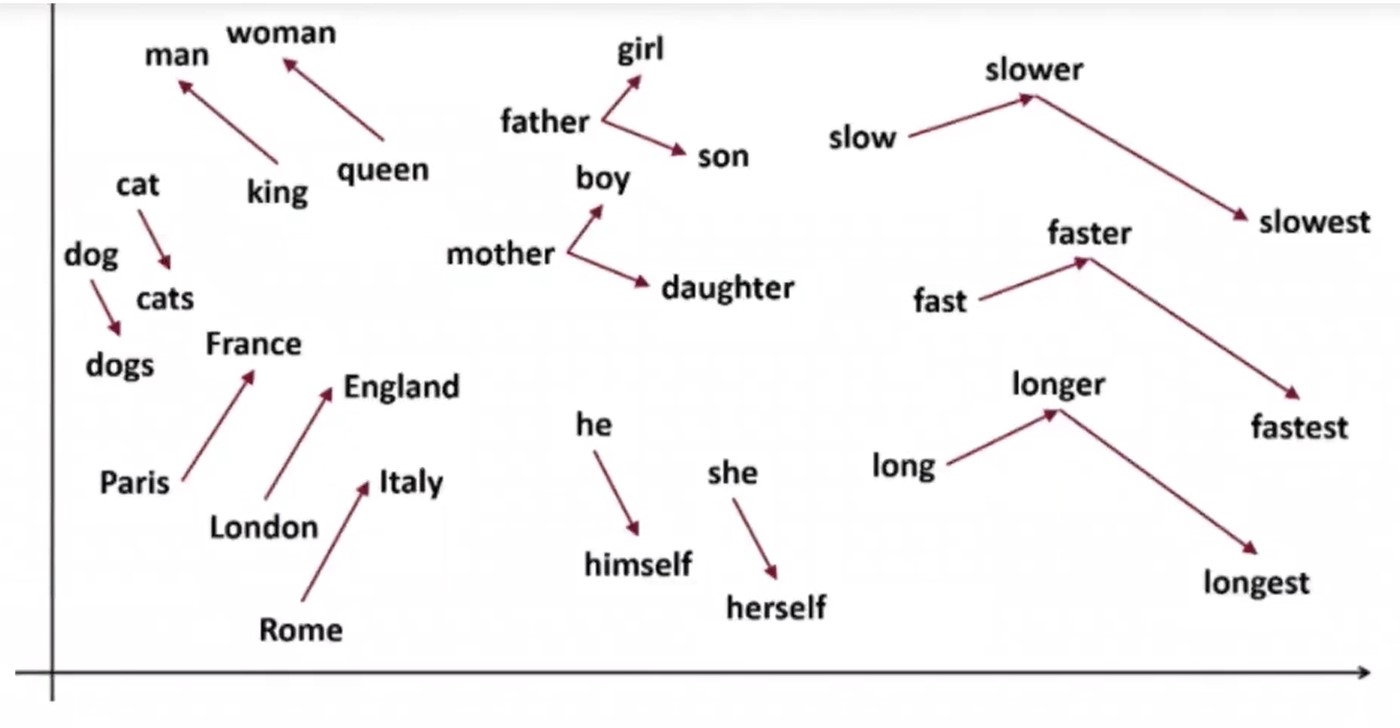